# Cardiovascular Disease Data Analysis

### This is an exploratory data analysis notebook where a cardiovascular disease dataset will be inspected

Data set is taken from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'data/cardio_train.csv'
df = pd.read_csv(path, sep= ';')

### Description of the different variables that will be analyzed in this notebook
- Age is in days.
- Gender: 1 - women, 2 - men
- Height: cm
- Weight: kg
- ap_hi: Systolic Blood Pressure
- ap_lo: Diastolic Blood Pressure
- Cholesterol: 1-normal, 2-above normal, 3-well above normal
- Gluc: normal, 2: above normal, 3: well above normal
- Smoke - Binary
- Alch - Binary
- Cardio - Binary
*For the binary variables 0 is no and 1 is yes*


# Data Inspection

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [7]:
def binary_to_gender(x):
    if x == 1:
        return 'female'
    if x == 2:
        return 'male'
df.gender = df.gender.apply(binary_to_gender)

In [44]:
df = df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic'})

In [48]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,disease_presence,bmi
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,No,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,Yes,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,Yes,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,Yes,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,No,23.011177


### Derive a BMI column from the height and weight columns

In [49]:
def bmi(data):
    return data.weight / (data.height / 100) **2
    

In [11]:
df['bmi'] = df.apply(bmi, axis= 1)

In [12]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [13]:
#Check to see if there are any NA Values
df.isna().values.any()

False

In [14]:
#Are there any duplicated values

df.duplicated().any()

False

In [15]:
#How many unactive smokers are there in the dataset?
unactive_smokers = df.loc[(df.active == 0) & 
                                  (df.smoke == 1)]
len(unactive_smokers)

1007

In [16]:
#What percent of CV patients are smokers in this data set

CV_pts = df.loc[(df.cardio == 1)]
smoke_cv_pts = CV_pts.loc[(CV_pts.smoke == 1)]

len(smoke_cv_pts) / len(df.loc[(df.cardio == 1)]) * 100

8.373595585922983

In [17]:
# What percent of CV patients are unactive v unactive
active_pt = CV_pts.loc[(CV_pts.smoke == 1)]
unactive_pt = CV_pts.loc[(CV_pts.smoke == 0)]

unactive_pct = len(unactive_pt) / len(CV_pts) * 100
active_pvt = len(active_pt) / len(CV_pts) * 100

print(f'{unactive_pct} % of patients with Cardiovascular disease are unactive and {active_pvt} % of patients with cardiovascular disease are active')

91.62640441407703 % of patients with Cardiovascular disease are unactive and 8.373595585922983 % of patients with cardiovascular disease are active


In [18]:
#What percent of unactive smokers have cardio disease?

pct = len(unactive_smokers.loc[(df.cardio == 1)]) / len(unactive_smokers) * 100

print(f'{pct}% of patients with Cardiovascular diseasea are both unactive and smokers.')

55.41211519364448% of patients with Cardiovascular diseasea are both unactive and smokers.


## What is the breakdown of CV pts compared to patients without CV disease?

In cardiovascular patients:
 - mean systolic BP is 137
 - mean diastolic BP is 109
 - mean cholesterol is at 1.52(where 1 is normal cholesterol levels)
 - mean BMI 28.5
 
In noncardiovascular patients:
- mean systolic BP is 120.43
- mean diastolic BP is 80.0
- mean cholesterol is at 1.0 (where 1 is normal cholesterol)
- mean BMI is 26.5

In [19]:
CV_pts.mean()

id             50082.102233
age            20056.813031
height           164.270334
weight            76.822368
systolic         137.212042
diastolic        109.023929
cholesterol        1.517396
gluc               1.277595
smoke              0.083736
alco               0.052117
active             0.789559
cardio             1.000000
bmi               28.566061
dtype: float64

In [20]:
no_CV_pts = df.loc[(df.cardio == 0)]
no_CV_pts.mean()

id             49862.869107
age            18881.623711
height           164.448017
weight            71.592150
systolic         120.432598
diastolic         84.251763
cholesterol        1.216527
gluc               1.175380
smoke              0.092516
alco               0.055424
active             0.817881
cardio             0.000000
bmi               26.548175
dtype: float64

In [21]:
# What percentage of noncardiovascular patients are nonsmokers?

len(no_CV_pts.loc[(no_CV_pts.smoke == 1)]) / len(no_CV_pts) * 100

9.251591902001657

Text(0, 0.5, 'bmi')

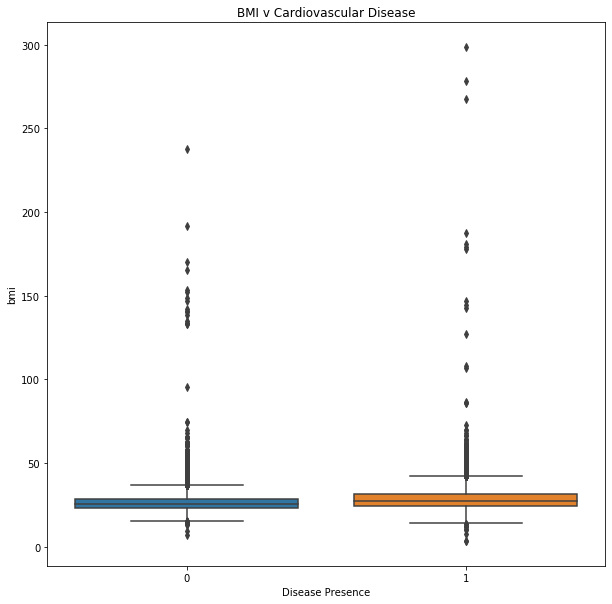

In [33]:
plt.figure(figsize= (10,10))
sns.boxplot(x = 'cardio', y= 'bmi', data= df)
plt.title('BMI v Cardiovascular Disease')
plt.xlabel('Disease Presence')
plt.ylabel('bmi')

# Major Takeways
1. On average patients with cardiovascular disease have higher systolic/diastolic blood pressure then patients without CV disease.
2. On average patients with cardiovascular disease higher levels of cholesterol and glucose then patients without CV
3. On average patients with cardiovascular disease have a higher BMI

# Interesting findings
1. In this dataset there 8.3 % of CV patients were marked as smokers while 9.3 % of patients without CV disease were marked as smokers. 
2. Although this is an interesting finding, it is important to note that patients were labeled as either smokers or nonsmokers and frequency of smoking is not taken into account in this dataset.

# Next Steps
1. Some of the values in the BMI are so high it seems unlikely these are real values. The next step is to verify if the data collection was collected accurately. Extreme heights and weights should be inspected and possibly removed before further analysis.

### Export data

In [36]:
df.to_csv('clean_data.csv', index=False)
